<p><br>
<center>
<b><h1>ALY6140 : Analytics System Technology</h1></b>
<b><h2>Northeastern University</h2></b>
<b><h2>Professor Daya Rudhramoorthi </h2></b>
<b><h2>Group 1 - Bhavik Bhosale, Sneha Rokkam</h2></b>
<b><h2>Capstone Group Project</h2></b>
<b><h2>Boston Property Assesment</h2></b>
</center>
</p>

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
#from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,classification_report,roc_curve,plot_roc_curve,auc,precision_recall_curve,plot_precision_recall_curve,average_precision_score,mean_squared_error, r2_score, ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression, ridge_regression, Ridge, Lasso
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error

#from lightgbm import LGBMClassifier, LGBMRegressor

import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor # Import Random Forest Classifier
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.options.display.float_format = '{:.2f}'.format


import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

## Read the Dataset

In [2]:
#from group1_capstone import BostonPropertyDataFetcher
# Commenting the below code as the API fetches data in a loop of count 362. Saved the resultant dataframe to a csv and will read the data from the csv

#url = 'https://data.boston.gov/datastore/odata3.0/1000d81c-5bb5-49e8-a9ab-44cd042f1db2?$format=xml'

# boston_data = BostonPropertyDataFetcher(url)

# assessment_data = boston_data.fetch_data()

# Read the CSV file
assessment_data = pd.read_csv('BostonProp.csv')


# Update column names
assessment_data.columns = assessment_data.columns.str[2:]

assessment_data.head(5)


,_id,PID,CM_ID,GIS_ID,ST_NUM,ST_NAME,UNIT_NUM,CITY,ZIP_CODE,BLDG_SEQ,NUM_BLDGS,LUC,LU,LU_DESC,BLDG_TYPE,OWN_OCC,OWNER,OWNERMAILADDRESS,RES_FLOOR,CD_FLOOR,RES_UNITS,COM_UNITS,RC_UNITS,LAND_SF,GROSS_AREA,LIVING_AREA,LAND_VALUE,BLDG_VALUE,TOTAL_VALUE,GROSS_TAX,YR_BUILT,YR_REMODEL,STRUCTURE_CLASS,ROOF_STRUCTURE,ROOF_COVER,INT_WALL,EXT_FNISHED,INT_COND,EXT_COND,OVERALL_COND,BED_RMS,FULL_BTH,HLF_BTH,KITCHENS,TT_RMS,BDRM_COND,BTHRM_STYLE1,BTHRM_STYLE2,BTHRM_STYLE3,KITCHEN_TYPE,KITCHEN_STYLE1,KITCHEN_STYLE2,KITCHEN_STYLE3,HEAT_TYPE,HEAT_FUEL,AC_TYPE,FIREPLACES,ORIENTATION,NUM_PARKING,PROP_VIEW,CORNER_UNIT
0,1,100001000,NaN,100001000,104.00,PUTNAM ST,NaN,EAST BOSTON,2128.00,1.00,1,105,R3,THREE-FAM DWELLING,RE - Row End,Y,PASCUCCI CARLO,"195 LEXINGTON ST, EAST BOSTON, MA 02128",3.00,NaN,NaN,NaN,NaN,1150.00,3353.00,2202.00,195700,588500,784200,8422.31,1900.00,NaN,NaN,F - Flat,C - Composition,N - Normal,A - Asbestos,A - Average,F - Fair,A - Average,6.00,3.00,0.00,3.00,12.00,NaN,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,3F - 3 Full Eat In Kitchens,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,W - Ht Water/Steam,NaN,N - None,0.00,NaN,3.00,A - Average,NaN
1,2,100002000,NaN,100002000,197.00,Lexington ST,NaN,EAST BOSTON,2128.00,1.00,1,105,R3,THREE-FAM DWELLING,RM - Row Middle,Y,SEMBRANO RODERICK,"197 LEXINGTON ST, EAST BOSTON, MA 02128",3.00,NaN,NaN,NaN,NaN,1150.00,3299.00,2307.00,196500,615300,811800,8718.73,1920.00,2000.00,NaN,F - Flat,C - Composition,N - Normal,M - Vinyl,A - Average,A - Average,A - Average,3.00,3.00,0.00,3.00,9.00,NaN,M - Modern,M - Modern,M - Modern,3F - 3 Full Eat In Kitchens,M - Modern,M - Modern,M - Modern,F - Forced Hot Air,NaN,C - Central AC,0.00,NaN,0.00,A - Average,NaN
2,3,100003000,NaN,100003000,199.00,Lexington ST,NaN,EAST BOSTON,2128.00,1.00,1,105,R3,THREE-FAM DWELLING,RM - Row Middle,N,GUERRA CHEVARRIA ANA S,"199 LEXINGTON ST, EAST BOSTON, MA 02128",3.00,NaN,NaN,NaN,NaN,1150.00,3392.00,2268.00,197100,599200,796300,8552.26,1905.00,1985.00,NaN,F - Flat,C - Composition,N - Normal,M - Vinyl,A - Average,G - Good,A - Average,5.00,3.00,0.00,3.00,13.00,NaN,M - Modern,M - Modern,M - Modern,3F - 3 Full Eat In Kitchens,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,S - Space Heat,NaN,N - None,0.00,NaN,0.00,A - Average,NaN
3,4,100004000,NaN,100004000,201.00,Lexington ST,NaN,EAST BOSTON,2128.00,1.00,1,105,R3,THREE-FAM DWELLING,RM - Row Middle,N,"MADDALENI JAMES E, TS","PO BOX 557 #, EVERETT, MA 02149",3.00,NaN,NaN,NaN,NaN,1150.00,3108.00,2028.00,197700,530200,727900,7817.65,1900.00,1991.00,NaN,M - Mansard,C - Composition,N - Normal,M - Vinyl,A - Average,A - Average,A - Average,5.00,3.00,0.00,3.00,11.00,NaN,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,3F - 3 Full Eat In Kitchens,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,W - Ht Water/Steam,NaN,N - None,0.00,NaN,0.00,A - Average,NaN
4,5,100005000,NaN,100005000,203.00,Lexington ST,NaN,EAST BOSTON,2128.00,1.00,1,104,R2,TWO-FAM DWELLING,RE - Row End,Y,MARKS TRAVIS JOSEPH,"203 Lexington ST, EAST BOSTON, MA 02128",3.00,NaN,NaN,NaN,NaN,2010.00,3700.00,2546.00,225700,569100,794800,8536.15,1900.00,1978.00,NaN,M - Mansard,C - Composition,N - Normal,M - Vinyl,A - Average,A - Average,A - Average,6.00,3.00,0.00,2.00,13.00,NaN,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,2F - 2 Full Eat In Kitchens,S - Semi-Modern,S - Semi-Modern,NaN,W - Ht Water/Steam,NaN,N - None,0.00,NaN,0.00,A - Average,NaN


In [3]:
assessment_data.shape

(180627, 61)

In [4]:
assessment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180627 entries, 0 to 180626
Data columns (total 61 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   _id               180627 non-null  int64  
 1   PID               180627 non-null  int64  
 2   CM_ID             91160 non-null   float64
 3   GIS_ID            180627 non-null  int64  
 4   ST_NUM            171096 non-null  float64
 5   ST_NAME           180627 non-null  object 
 6   UNIT_NUM          80672 non-null   object 
 7   CITY              180622 non-null  object 
 8   ZIP_CODE          180624 non-null  float64
 9   BLDG_SEQ          180626 non-null  float64
 10  NUM_BLDGS         180627 non-null  int64  
 11  LUC               180627 non-null  int64  
 12  LU                180627 non-null  object 
 13  LU_DESC           180627 non-null  object 
 14  BLDG_TYPE         178101 non-null  object 
 15  OWN_OCC           180627 non-null  object 
 16  OWNER             18

## Data Preprocessing

In [5]:
from group1_capstone import DataProcessor

processor = DataProcessor()

processed_data = processor.process_data(assessment_data)


The duplicates found in the PID column: 
 _id                 179
PID                 179
CM_ID                 2
GIS_ID              179
ST_NUM              176
ST_NAME             179
UNIT_NUM              1
CITY                178
ZIP_CODE            179
BLDG_SEQ            179
NUM_BLDGS           179
LUC                 179
LU                  179
LU_DESC             179
BLDG_TYPE           179
OWN_OCC             179
OWNER               179
OWNERMAILADDRESS    179
RES_FLOOR           178
CD_FLOOR              1
RES_UNITS             1
COM_UNITS             0
RC_UNITS              0
LAND_SF             179
GROSS_AREA          178
LIVING_AREA         178
LAND_VALUE          179
BLDG_VALUE          179
TOTAL_VALUE         179
GROSS_TAX           179
YR_BUILT            179
YR_REMODEL           68
STRUCTURE_CLASS       4
ROOF_STRUCTURE      179
ROOF_COVER          179
INT_WALL            177
EXT_FNISHED         179
INT_COND            178
EXT_COND            179
OVERALL_COND        17

In [6]:
processed_data.head(5)

,PID,CM_ID,GIS_ID,ST_NUM,ST_NAME,UNIT_NUM,CITY,ZIP_CODE,BLDG_SEQ,NUM_BLDGS,LUC,LU,LU_DESC,BLDG_TYPE,OWN_OCC,OWNER,OWNERMAILADDRESS,RES_FLOOR,CD_FLOOR,RES_UNITS,COM_UNITS,RC_UNITS,LAND_SF,GROSS_AREA,LIVING_AREA,LAND_VALUE,BLDG_VALUE,TOTAL_VALUE,GROSS_TAX,YR_BUILT,YR_REMODEL,STRUCTURE_CLASS,ROOF_STRUCTURE,ROOF_COVER,INT_WALL,EXT_FNISHED,INT_COND,EXT_COND,OVERALL_COND,BED_RMS,FULL_BTH,HLF_BTH,KITCHENS,TT_RMS,BDRM_COND,BTHRM_STYLE1,BTHRM_STYLE2,BTHRM_STYLE3,KITCHEN_TYPE,KITCHEN_STYLE1,KITCHEN_STYLE2,KITCHEN_STYLE3,HEAT_TYPE,HEAT_FUEL,AC_TYPE,FIREPLACES,ORIENTATION,NUM_PARKING,PROP_VIEW,CORNER_UNIT
0,100001000,NaN,100001000,104.00,PUTNAM ST,NaN,EAST BOSTON,2128.00,1.00,1,105,R3,THREE-FAM DWELLING,RE - Row End,Y,PASCUCCI CARLO,"195 LEXINGTON ST, EAST BOSTON, MA 02128",3.00,NaN,NaN,NaN,NaN,1150.00,3353.00,2202.00,195700,588500,784200,8422.31,1900.00,NaN,NaN,F - Flat,C - Composition,N - Normal,A - Asbestos,A - Average,F - Fair,A - Average,6.00,3.00,0.00,3.00,12.00,NaN,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,3F - 3 Full Eat In Kitchens,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,W - Ht Water/Steam,NaN,N - None,0.00,NaN,3.00,A - Average,NaN
1,100002000,NaN,100002000,197.00,Lexington ST,NaN,EAST BOSTON,2128.00,1.00,1,105,R3,THREE-FAM DWELLING,RM - Row Middle,Y,SEMBRANO RODERICK,"197 LEXINGTON ST, EAST BOSTON, MA 02128",3.00,NaN,NaN,NaN,NaN,1150.00,3299.00,2307.00,196500,615300,811800,8718.73,1920.00,2000.00,NaN,F - Flat,C - Composition,N - Normal,M - Vinyl,A - Average,A - Average,A - Average,3.00,3.00,0.00,3.00,9.00,NaN,M - Modern,M - Modern,M - Modern,3F - 3 Full Eat In Kitchens,M - Modern,M - Modern,M - Modern,F - Forced Hot Air,NaN,C - Central AC,0.00,NaN,0.00,A - Average,NaN
2,100003000,NaN,100003000,199.00,Lexington ST,NaN,EAST BOSTON,2128.00,1.00,1,105,R3,THREE-FAM DWELLING,RM - Row Middle,N,GUERRA CHEVARRIA ANA S,"199 LEXINGTON ST, EAST BOSTON, MA 02128",3.00,NaN,NaN,NaN,NaN,1150.00,3392.00,2268.00,197100,599200,796300,8552.26,1905.00,1985.00,NaN,F - Flat,C - Composition,N - Normal,M - Vinyl,A - Average,G - Good,A - Average,5.00,3.00,0.00,3.00,13.00,NaN,M - Modern,M - Modern,M - Modern,3F - 3 Full Eat In Kitchens,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,S - Space Heat,NaN,N - None,0.00,NaN,0.00,A - Average,NaN
3,100004000,NaN,100004000,201.00,Lexington ST,NaN,EAST BOSTON,2128.00,1.00,1,105,R3,THREE-FAM DWELLING,RM - Row Middle,N,"MADDALENI JAMES E, TS","PO BOX 557 #, EVERETT, MA 02149",3.00,NaN,NaN,NaN,NaN,1150.00,3108.00,2028.00,197700,530200,727900,7817.65,1900.00,1991.00,NaN,M - Mansard,C - Composition,N - Normal,M - Vinyl,A - Average,A - Average,A - Average,5.00,3.00,0.00,3.00,11.00,NaN,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,3F - 3 Full Eat In Kitchens,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,W - Ht Water/Steam,NaN,N - None,0.00,NaN,0.00,A - Average,NaN
4,100005000,NaN,100005000,203.00,Lexington ST,NaN,EAST BOSTON,2128.00,1.00,1,104,R2,TWO-FAM DWELLING,RE - Row End,Y,MARKS TRAVIS JOSEPH,"203 Lexington ST, EAST BOSTON, MA 02128",3.00,NaN,NaN,NaN,NaN,2010.00,3700.00,2546.00,225700,569100,794800,8536.15,1900.00,1978.00,NaN,M - Mansard,C - Composition,N - Normal,M - Vinyl,A - Average,A - Average,A - Average,6.00,3.00,0.00,2.00,13.00,NaN,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,2F - 2 Full Eat In Kitchens,S - Semi-Modern,S - Semi-Modern,NaN,W - Ht Water/Steam,NaN,N - None,0.00,NaN,0.00,A - Average,NaN


In [7]:
processed_data.shape

(180448, 60)

### Descriptive Statistics

In [8]:
desc_result = processor.describe_numerical_columns(processed_data)
desc_result

,PID,CM_ID,GIS_ID,ST_NUM,ST_NAME,UNIT_NUM,CITY,ZIP_CODE,BLDG_SEQ,NUM_BLDGS,LUC,LU,LU_DESC,BLDG_TYPE,OWN_OCC,OWNER,OWNERMAILADDRESS,RES_FLOOR,CD_FLOOR,RES_UNITS,COM_UNITS,RC_UNITS,LAND_SF,GROSS_AREA,LIVING_AREA,LAND_VALUE,BLDG_VALUE,TOTAL_VALUE,GROSS_TAX,YR_BUILT,YR_REMODEL,STRUCTURE_CLASS,ROOF_STRUCTURE,ROOF_COVER,INT_WALL,EXT_FNISHED,INT_COND,EXT_COND,OVERALL_COND,BED_RMS,FULL_BTH,HLF_BTH,KITCHENS,TT_RMS,BDRM_COND,BTHRM_STYLE1,BTHRM_STYLE2,BTHRM_STYLE3,KITCHEN_TYPE,KITCHEN_STYLE1,KITCHEN_STYLE2,KITCHEN_STYLE3,HEAT_TYPE,HEAT_FUEL,AC_TYPE,FIREPLACES,ORIENTATION,NUM_PARKING,PROP_VIEW,CORNER_UNIT
count,180448.00,91158.00,180448.00,170920.00,180448,80671,180444,180445.00,180447.00,180448.00,180448.00,180448,180448,177922,180448,180448,180447,146944.00,70555.00,10329.00,623.00,37.00,172903.00,145816.00,145526.00,180448.00,180448.00,180448.00,180448.00,157518.00,85330.00,17055,144028,144030,132183,157427,132184,144065,170989,132164.00,169333.00,169486.00,169335.00,132098.00,70470,132351,84870,36190,132334,132347,31715,14031,132604,70811,132590,169489.00,70778,132250.00,133686,70790
unique,NaN,NaN,NaN,NaN,4512,14096,19,NaN,NaN,NaN,NaN,17,194,204,2,142088,150153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,7,7,4,28,5,5,10,NaN,NaN,NaN,NaN,NaN,5,4,4,4,10,4,4,4,7,5,3,NaN,7,NaN,6,2
top,NaN,NaN,NaN,NaN,COMMONWEALTH AV,1,BOSTON,NaN,NaN,NaN,NaN,CD,RESIDENTIAL CONDO,RM - Row Middle,N,CITY OF BOSTON,"140 COMMONWEALTH AVE, CHESTNUT HILL, MA 02467",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C - Brick/Concr,F - Flat,A - Asphalt Shingl,N - Normal,B - Brick/Stone,A - Average,A - Average,A - Average,NaN,NaN,NaN,NaN,NaN,A - Average,M - Modern,M - Modern,M - Modern,O - One Person,M - Modern,S - Semi-Modern,S - Semi-Modern,W - Ht Water/Steam,I - Indiv. Cntrl,N - None,NaN,T - Through,NaN,A - Average,N - No
freq,NaN,NaN,NaN,NaN,4826,8404,47103,NaN,NaN,NaN,NaN,70571,70557,17661,102014,1960,176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10155,67322,63541,127473,51925,63778,79318,131614,NaN,NaN,NaN,NaN,NaN,55356,59896,40453,18142,44030,62779,18513,7953,71552,43552,79396,NaN,37274,NaN,109980,57286
mean,1141872743.02,916700965.96,1141873828.03,226.84,NaN,NaN,NaN,2129.84,1.00,1.02,202.66,NaN,NaN,NaN,NaN,NaN,NaN,1.88,3.51,6.84,3.03,3.24,7810.99,5386.36,4369.60,376652.42,1120716.28,1500358.13,16932.77,1932.34,2001.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.15,1.35,0.22,1.05,6.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.27,NaN,1.34,NaN,NaN
std,708114503.99,687936774.77,708115414.47,477.35,NaN,NaN,NaN,30.77,0.03,0.46,265.92,NaN,NaN,NaN,NaN,NaN,NaN,1.12,5.27,18.38,10.53,6.13,263198.82,41402.56,38494.85,4424357.56,10808892.37,14123131.29,220704.56,63.72,65.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.10,1.05,0.46,0.81,4.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.62,NaN,2.42,NaN,NaN
min,100001000.00,100018000.00,100001000.00,0.00,NaN,NaN,NaN,2026.00,1.00,1.00,13.00,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,1.00,1.00,1.00,100.00,3.00,2.00,0.00,0.00,0.00,0.00,1700.00,201.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,NaN,NaN
25%,501666750.00,306925000.00,501667000.00,24.00,NaN,NaN,NaN,2119.00,1.00,1.00,102.00,NaN,NaN,NaN,NaN,NaN,NaN,1.00,1.00,2.00,1.00,1.00,999.00,973.00,947.00,0.00,298500.00,379400.00,3879.29,1900.00,1987.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,1.00,0.00,1.00,4.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,NaN,NaN
50%,1102683001.00,602642400.00,1102683000.00,68.00,NaN,NaN,NaN,2127.00,1.00,1.00,102.00,NaN,NaN,NaN,NaN,NaN,NaN,2.00,2.00,3.00,1.00,1.00,2008.00,2122.00,1492.00,0.00,488900.00,609227.00,6456.59,1920.00,2004.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00,1.00,0.00,1.00,6.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,1.00,NaN,NaN
75%,1810485250.00,1602267000.00,1810485250.00,213.00,NaN,NaN,NaN,2131.00,1.00,1.00,108.00,NaN,NaN,NaN,NaN,NaN,NaN,2.50,4.00,5.00,2.00,2.00,4764.00,4035.00,2611.20,224700.00,744300.00,913100.00,9703.55,1

In [9]:
#Check for numerical and categorical variables in the dataframe 
numerical_variables = processed_data.select_dtypes(include=['int64', 'float64']).columns
categorical_variables = processed_data.select_dtypes(include=['object']).columns

print("Numerical Variables:")
print(numerical_variables)

print("\nCategorical Variables:")
print(categorical_variables)



Numerical Variables:
Index(['PID', 'CM_ID', 'GIS_ID', 'ST_NUM', 'ZIP_CODE', 'BLDG_SEQ', 'NUM_BLDGS',
       'LUC', 'RES_FLOOR', 'CD_FLOOR', 'RES_UNITS', 'COM_UNITS', 'RC_UNITS',
       'LAND_SF', 'GROSS_AREA', 'LIVING_AREA', 'LAND_VALUE', 'BLDG_VALUE',
       'TOTAL_VALUE', 'GROSS_TAX', 'YR_BUILT', 'YR_REMODEL', 'BED_RMS',
       'FULL_BTH', 'HLF_BTH', 'KITCHENS', 'TT_RMS', 'FIREPLACES',
       'NUM_PARKING'],
      dtype='object')

Categorical Variables:
Index(['ST_NAME', 'UNIT_NUM', 'CITY', 'LU', 'LU_DESC', 'BLDG_TYPE', 'OWN_OCC',
       'OWNER', 'OWNERMAILADDRESS', 'STRUCTURE_CLASS', 'ROOF_STRUCTURE',
       'ROOF_COVER', 'INT_WALL', 'EXT_FNISHED', 'INT_COND', 'EXT_COND',
       'OVERALL_COND', 'BDRM_COND', 'BTHRM_STYLE1', 'BTHRM_STYLE2',
       'BTHRM_STYLE3', 'KITCHEN_TYPE', 'KITCHEN_STYLE1', 'KITCHEN_STYLE2',
       'KITCHEN_STYLE3', 'HEAT_TYPE', 'HEAT_FUEL', 'AC_TYPE', 'ORIENTATION',
       'PROP_VIEW', 'CORNER_UNIT'],
      dtype='object')


In [10]:
processed_data.head(5)

,PID,CM_ID,GIS_ID,ST_NUM,ST_NAME,UNIT_NUM,CITY,ZIP_CODE,BLDG_SEQ,NUM_BLDGS,LUC,LU,LU_DESC,BLDG_TYPE,OWN_OCC,OWNER,OWNERMAILADDRESS,RES_FLOOR,CD_FLOOR,RES_UNITS,COM_UNITS,RC_UNITS,LAND_SF,GROSS_AREA,LIVING_AREA,LAND_VALUE,BLDG_VALUE,TOTAL_VALUE,GROSS_TAX,YR_BUILT,YR_REMODEL,STRUCTURE_CLASS,ROOF_STRUCTURE,ROOF_COVER,INT_WALL,EXT_FNISHED,INT_COND,EXT_COND,OVERALL_COND,BED_RMS,FULL_BTH,HLF_BTH,KITCHENS,TT_RMS,BDRM_COND,BTHRM_STYLE1,BTHRM_STYLE2,BTHRM_STYLE3,KITCHEN_TYPE,KITCHEN_STYLE1,KITCHEN_STYLE2,KITCHEN_STYLE3,HEAT_TYPE,HEAT_FUEL,AC_TYPE,FIREPLACES,ORIENTATION,NUM_PARKING,PROP_VIEW,CORNER_UNIT
0,100001000,NaN,100001000,104.00,PUTNAM ST,NaN,EAST BOSTON,2128.00,1.00,1,105,R3,THREE-FAM DWELLING,RE - Row End,Y,PASCUCCI CARLO,"195 LEXINGTON ST, EAST BOSTON, MA 02128",3.00,NaN,NaN,NaN,NaN,1150.00,3353.00,2202.00,195700,588500,784200,8422.31,1900.00,NaN,NaN,F - Flat,C - Composition,N - Normal,A - Asbestos,A - Average,F - Fair,A - Average,6.00,3.00,0.00,3.00,12.00,NaN,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,3F - 3 Full Eat In Kitchens,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,W - Ht Water/Steam,NaN,N - None,0.00,NaN,3.00,A - Average,NaN
1,100002000,NaN,100002000,197.00,Lexington ST,NaN,EAST BOSTON,2128.00,1.00,1,105,R3,THREE-FAM DWELLING,RM - Row Middle,Y,SEMBRANO RODERICK,"197 LEXINGTON ST, EAST BOSTON, MA 02128",3.00,NaN,NaN,NaN,NaN,1150.00,3299.00,2307.00,196500,615300,811800,8718.73,1920.00,2000.00,NaN,F - Flat,C - Composition,N - Normal,M - Vinyl,A - Average,A - Average,A - Average,3.00,3.00,0.00,3.00,9.00,NaN,M - Modern,M - Modern,M - Modern,3F - 3 Full Eat In Kitchens,M - Modern,M - Modern,M - Modern,F - Forced Hot Air,NaN,C - Central AC,0.00,NaN,0.00,A - Average,NaN
2,100003000,NaN,100003000,199.00,Lexington ST,NaN,EAST BOSTON,2128.00,1.00,1,105,R3,THREE-FAM DWELLING,RM - Row Middle,N,GUERRA CHEVARRIA ANA S,"199 LEXINGTON ST, EAST BOSTON, MA 02128",3.00,NaN,NaN,NaN,NaN,1150.00,3392.00,2268.00,197100,599200,796300,8552.26,1905.00,1985.00,NaN,F - Flat,C - Composition,N - Normal,M - Vinyl,A - Average,G - Good,A - Average,5.00,3.00,0.00,3.00,13.00,NaN,M - Modern,M - Modern,M - Modern,3F - 3 Full Eat In Kitchens,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,S - Space Heat,NaN,N - None,0.00,NaN,0.00,A - Average,NaN
3,100004000,NaN,100004000,201.00,Lexington ST,NaN,EAST BOSTON,2128.00,1.00,1,105,R3,THREE-FAM DWELLING,RM - Row Middle,N,"MADDALENI JAMES E, TS","PO BOX 557 #, EVERETT, MA 02149",3.00,NaN,NaN,NaN,NaN,1150.00,3108.00,2028.00,197700,530200,727900,7817.65,1900.00,1991.00,NaN,M - Mansard,C - Composition,N - Normal,M - Vinyl,A - Average,A - Average,A - Average,5.00,3.00,0.00,3.00,11.00,NaN,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,3F - 3 Full Eat In Kitchens,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,W - Ht Water/Steam,NaN,N - None,0.00,NaN,0.00,A - Average,NaN
4,100005000,NaN,100005000,203.00,Lexington ST,NaN,EAST BOSTON,2128.00,1.00,1,104,R2,TWO-FAM DWELLING,RE - Row End,Y,MARKS TRAVIS JOSEPH,"203 Lexington ST, EAST BOSTON, MA 02128",3.00,NaN,NaN,NaN,NaN,2010.00,3700.00,2546.00,225700,569100,794800,8536.15,1900.00,1978.00,NaN,M - Mansard,C - Composition,N - Normal,M - Vinyl,A - Average,A - Average,A - Average,6.00,3.00,0.00,2.00,13.00,NaN,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,2F - 2 Full Eat In Kitchens,S - Semi-Modern,S - Semi-Modern,NaN,W - Ht Water/Steam,NaN,N - None,0.00,NaN,0.00,A - Average,NaN


### Drop Unwanted Columns

In [11]:
unwanted_columns = ['CM_ID',
                    'GIS_ID',
                    'ST_NUM',
                    'ST_NAME',
                    'UNIT_NUM',
                    'LUC',
                    'LU_DESC',
                    'OWNERMAILADDRESS',
                    'RES_FLOOR',
                    'CD_FLOOR',
                    'RES_UNITS',
                    'COM_UNITS',
                    'RC_UNITS',
                    'LAND_SF',
                    'LAND_VALUE',
                    'ROOF_COVER',
                    'BTHRM_STYLE1',
                    'BTHRM_STYLE2',
                    'BTHRM_STYLE3',
                    'KITCHEN_STYLE1',
                    'KITCHEN_STYLE2',
                    'KITCHEN_STYLE3',
                    'HEAT_FUEL',
                    'FIREPLACES',
                    'ORIENTATION',
                    'NUM_PARKING',
                    'STRUCTURE_CLASS',
                    'BDRM_COND',
                    'BLDG_SEQ',
                    'NUM_BLDGS', 
                    'BLDG_TYPE', 
                    'OWN_OCC',
                    'CORNER_UNIT',
                    'OWNER',
                    'GROSS_AREA', 
                    'BLDG_VALUE'
                   ]

# Drop these rows from dataFrame
property_data = processed_data.drop(unwanted_columns, inplace = False, axis='columns')

In [12]:
property_data.columns

Index(['PID', 'CITY', 'ZIP_CODE', 'LU', 'LIVING_AREA', 'TOTAL_VALUE',
       'GROSS_TAX', 'YR_BUILT', 'YR_REMODEL', 'ROOF_STRUCTURE', 'INT_WALL',
       'EXT_FNISHED', 'INT_COND', 'EXT_COND', 'OVERALL_COND', 'BED_RMS',
       'FULL_BTH', 'HLF_BTH', 'KITCHENS', 'TT_RMS', 'KITCHEN_TYPE',
       'HEAT_TYPE', 'AC_TYPE', 'PROP_VIEW'],
      dtype='object')

### Missing Value Treatment 

In [13]:
residentail_LU = ['CD','R1','R2','R3']
property_data = property_data[property_data['LU'].isin(residentail_LU)]
property_data.shape

(131432, 24)

In [14]:
# Count total missing values at each column in DataFrame
missing_values_count = property_data.isnull().sum()

# Calculate percentage of missing values at each column in DataFrame
missing_values_percentage = (property_data.isnull().sum() / len(property_data)) * 100

# Create a new DataFrame with the column name, missing value count and missing value percentage
missing_data_df = pd.DataFrame({
    'Missing Value Count': missing_values_count,
    'Missing Value Percentage': missing_values_percentage
})

# Format the 'Missing Value Percentage' column as a percentage with 2 decimal places
missing_data_df['Missing Value Percentage'] = missing_data_df['Missing Value Percentage'].apply(lambda x: f'{x:.2f}%')

print(missing_data_df)

                Missing Value Count Missing Value Percentage
PID                               0                    0.00%
CITY                              1                    0.00%
ZIP_CODE                          0                    0.00%
LU                                0                    0.00%
LIVING_AREA                      20                    0.02%
TOTAL_VALUE                       0                    0.00%
GROSS_TAX                         0                    0.00%
YR_BUILT                         74                    0.06%
YR_REMODEL                    57534                   43.77%
ROOF_STRUCTURE                   48                    0.04%
INT_WALL                         19                    0.01%
EXT_FNISHED                      18                    0.01%
INT_COND                         19                    0.01%
EXT_COND                         18                    0.01%
OVERALL_COND                   7035                    5.35%
BED_RMS                 

In [15]:
property_data.head(5)

,PID,CITY,ZIP_CODE,LU,LIVING_AREA,TOTAL_VALUE,GROSS_TAX,YR_BUILT,YR_REMODEL,ROOF_STRUCTURE,INT_WALL,EXT_FNISHED,INT_COND,EXT_COND,OVERALL_COND,BED_RMS,FULL_BTH,HLF_BTH,KITCHENS,TT_RMS,KITCHEN_TYPE,HEAT_TYPE,AC_TYPE,PROP_VIEW
0,100001000,EAST BOSTON,2128.00,R3,2202.00,784200,8422.31,1900.00,NaN,F - Flat,N - Normal,A - Asbestos,A - Average,F - Fair,A - Average,6.00,3.00,0.00,3.00,12.00,3F - 3 Full Eat In Kitchens,W - Ht Water/Steam,N - None,A - Average
1,100002000,EAST BOSTON,2128.00,R3,2307.00,811800,8718.73,1920.00,2000.00,F - Flat,N - Normal,M - Vinyl,A - Average,A - Average,A - Average,3.00,3.00,0.00,3.00,9.00,3F - 3 Full Eat In Kitchens,F - Forced Hot Air,C - Central AC,A - Average
2,100003000,EAST BOSTON,2128.00,R3,2268.00,796300,8552.26,1905.00,1985.00,F - Flat,N - Normal,M - Vinyl,A - Average,G - Good,A - Average,5.00,3.00,0.00,3.00,13.00,3F - 3 Full Eat In Kitchens,S - Space Heat,N - None,A - Average
3,100004000,EAST BOSTON,2128.00,R3,2028.00,727900,7817.65,1900.00,1991.00,M - Mansard,N - Normal,M - Vinyl,A - Average,A - Average,A - Average,5.00,3.00,0.00,3.00,11.00,3F - 3 Full Eat In Kitchens,W - Ht Water/Steam,N - None,A - Average
4,100005000,EAST BOSTON,2128.00,R2,2546.00,794800,8536.15,1900.00,1978.00,M - Mansard,N - Normal,M - Vinyl,A - Average,A - Average,A - Average,6.00,3.00,0.00,2.00,13.00,2F - 2 Full Eat In Kitchens,W - Ht Water/Steam,N - None,A - Average


In [16]:
#Imputing mean values in place of missing data
city_means = round(property_data.groupby('CITY')['YR_BUILT'].mean())
property_data['YR_BUILT'] = property_data.groupby('CITY')['YR_BUILT'].transform(lambda x: x.fillna(round(x.mean())))

In [17]:
# Get unique values in 'OVERALL_COND' column
unique_conditions = property_data['OVERALL_COND'].unique()

# Mapping of condition categories to numerical values
category_mapping = {
    'A - Average': 2,
    'G - Good': 3,
    np.nan: np.nan,  # If you want to keep NaN values as NaN
    'P - Poor': 1,
    'F - Fair': 2,
    'E - Excellent': 4,
    'VG - Very Good': 4,
    'EX - Excellent': 4
}

# Map condition categories to numerical values
property_data['OVERALL_COND'] = property_data['OVERALL_COND'].map(category_mapping)

# Get unique values in 'OVERALL_COND' column after mapping
unique_conditions_updated = property_data['OVERALL_COND'].unique()

# Fill NaN values in 'OVERALL_COND' column with the mean value per 'CITY' group
property_data['OVERALL_COND'] = property_data.groupby('CITY')['OVERALL_COND'].transform(
    lambda x: x.fillna(round(x.mean()))
)


In [18]:
property_data['YR_REMODEL'] = property_data['YR_REMODEL'].fillna(property_data['YR_BUILT'])
property_data.dropna(inplace=True)

In [19]:
# Check the percentage and count of the missing data 

def print_missing_value_summary(df):
    for col in df.columns:
        pct_missing = np.mean(df[col].isnull())
        print('{:<15s} : {:<5d} \t: {:.2f}%'.format(col, sum(df[col].isnull()), round(pct_missing * 100, 2)))

print_missing_value_summary(property_data)

PID             : 0     	: 0.00%
CITY            : 0     	: 0.00%
ZIP_CODE        : 0     	: 0.00%
LU              : 0     	: 0.00%
LIVING_AREA     : 0     	: 0.00%
TOTAL_VALUE     : 0     	: 0.00%
GROSS_TAX       : 0     	: 0.00%
YR_BUILT        : 0     	: 0.00%
YR_REMODEL      : 0     	: 0.00%
ROOF_STRUCTURE  : 0     	: 0.00%
INT_WALL        : 0     	: 0.00%
EXT_FNISHED     : 0     	: 0.00%
INT_COND        : 0     	: 0.00%
EXT_COND        : 0     	: 0.00%
OVERALL_COND    : 0     	: 0.00%
BED_RMS         : 0     	: 0.00%
FULL_BTH        : 0     	: 0.00%
HLF_BTH         : 0     	: 0.00%
KITCHENS        : 0     	: 0.00%
TT_RMS          : 0     	: 0.00%
KITCHEN_TYPE    : 0     	: 0.00%
HEAT_TYPE       : 0     	: 0.00%
AC_TYPE         : 0     	: 0.00%
PROP_VIEW       : 0     	: 0.00%


In [20]:
property_data.shape

(131315, 24)

### Categorical Variables 

In [21]:
columns = property_data.select_dtypes(include=['object'])

for col in columns:
    print("# # # # #  {}  # # # # #".format(col))
    display(property_data[col].value_counts())

# # # # #  CITY  # # # # #


BOSTON              31226
DORCHESTER          21561
SOUTH BOSTON        10863
BRIGHTON             9870
JAMAICA PLAIN        9022
WEST ROXBURY         8807
ROSLINDALE           7483
HYDE PARK            7423
EAST BOSTON          7170
CHARLESTOWN          5216
MATTAPAN             3750
ROXBURY              3455
ALLSTON              3369
ROXBURY CROSSING     1112
CHESTNUT HILL         967
BROOKLINE              16
DEDHAM                  4
NEWTON                  1
Name: CITY, dtype: int64

# # # # #  LU  # # # # #


CD    70477
R1    30434
R2    16896
R3    13508
Name: LU, dtype: int64

# # # # #  ROOF_STRUCTURE  # # # # #


F - Flat       60289
G - Gable      43486
H - Hip        13200
M - Mansard    11640
L - Gambrel     2050
S - Shed         338
O - Other        312
Name: ROOF_STRUCTURE, dtype: int64

# # # # #  INT_WALL  # # # # #


N - Normal         126625
E - Elaborate        4620
S - Substandard        70
Name: INT_WALL, dtype: int64

# # # # #  EXT_FNISHED  # # # # #


B - Brick/Stone      47216
M - Vinyl            39765
W - Wood Shake       15237
F - Frame/Clapbrd    11569
C - Cement Board      6607
A - Asbestos          3783
G - Glass             2828
S - Stucco            1229
V - Brck/Stn Venr      918
P - Asphalt            914
U - Alum Siding        697
O - Other              339
K - Concrete           186
09 - Wood Siding        24
01 - Brick               3
Name: EXT_FNISHED, dtype: int64

# # # # #  INT_COND  # # # # #


A - Average      63479
G - Good         53746
E - Excellent    12844
F - Fair          1163
P - Poor            83
Name: INT_COND, dtype: int64

# # # # #  EXT_COND  # # # # #


A - Average      74148
G - Good         48011
E - Excellent     6972
F - Fair          2125
P - Poor            59
Name: EXT_COND, dtype: int64

# # # # #  KITCHEN_TYPE  # # # # #


O - One Person                 43641
1F - 1 Full Eat In Kitchens    29295
F - Full Eat In                23981
2F - 2 Full Eat In Kitchens    16875
3F - 3 Full Eat In Kitchens    12023
P - Pullman                     2737
0F - 0 Full Eat In Kitchens     2618
N - None                         115
4F - 4 Full Eat In Kitchens       29
5F - 5 Full Eat In Kitchens        1
Name: KITCHEN_TYPE, dtype: int64

# # # # #  HEAT_TYPE  # # # # #


W - Ht Water/Steam    70865
F - Forced Hot Air    49237
E - Electric           5828
P - Heat Pump          4601
S - Space Heat          658
N - None                 87
O - Other                39
Name: HEAT_TYPE, dtype: int64

# # # # #  AC_TYPE  # # # # #


N - None           78588
C - Central AC     51605
D - Ductless AC     1122
Name: AC_TYPE, dtype: int64

# # # # #  PROP_VIEW  # # # # #


A - Average      107956
G - Good          12238
F - Fair           5983
E - Excellent      4307
P - Poor            521
S - Special         310
Name: PROP_VIEW, dtype: int64

In [22]:
# 1. Created a reusable function map_categories() to handle the mapping of categories to numerical values.
# 2. sed the function to map categories for 'INT_COND', 'EXT_COND', and 'PROP_VIEW' columns, reducing code duplication.
# 3. Stored the unique values before and after mapping for each column, allowing easy access and comparison if needed later.
def map_categories(data, column, category_mapping):
    unique_values_before = data[column].unique()
    data[column] = data[column].map(category_mapping)
    unique_values_after = data[column].unique()
    return unique_values_before, unique_values_after

# Mapping categories for 'INT_COND' column
int_cond_mapping = {
    'A - Average': 2,
    'G - Good': 3,
    np.nan: np.nan,
    'P - Poor': 1,
    'F - Fair': 2,
    'E - Excellent': 4,
    'VG - Very Good': 4,
    'EX - Excellent': 4
}
int_cond_before, int_cond_after = map_categories(property_data, 'INT_COND', int_cond_mapping)

# Mapping categories for 'EXT_COND' column
ext_cond_mapping = {
    'A - Average': 2,
    'G - Good': 3,
    np.nan: np.nan,
    'P - Poor': 1,
    'F - Fair': 2,
    'E - Excellent': 4,
    'VG - Very Good': 4,
    'S - Special': 4
}
ext_cond_before, ext_cond_after = map_categories(property_data, 'EXT_COND', ext_cond_mapping)

# Mapping categories for 'PROP_VIEW' column
prop_view_mapping = {
    'A - Average': 2,
    'G - Good': 3,
    np.nan: np.nan,
    'P - Poor': 1,
    'F - Fair': 2,
    'E - Excellent': 4,
    'VG - Very Good': 4,
    'S - Special': 4
}
prop_view_before, prop_view_after = map_categories(property_data, 'PROP_VIEW', prop_view_mapping)


In [23]:
numerical_columns = property_data.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['PID', 'ZIP_CODE', 'LIVING_AREA', 'TOTAL_VALUE', 'GROSS_TAX',
       'YR_BUILT', 'YR_REMODEL', 'INT_COND', 'EXT_COND', 'OVERALL_COND',
       'BED_RMS', 'FULL_BTH', 'HLF_BTH', 'KITCHENS', 'TT_RMS', 'PROP_VIEW'],
      dtype='object')

In [24]:
property_data['ZIP_CODE'] = property_data['ZIP_CODE'].astype(str)

## EDA 

### Distribution of Numerical Variables 

In [25]:
property_data.describe()

,PID,LIVING_AREA,TOTAL_VALUE,GROSS_TAX,YR_BUILT,YR_REMODEL,INT_COND,EXT_COND,OVERALL_COND,BED_RMS,FULL_BTH,HLF_BTH,KITCHENS,TT_RMS,PROP_VIEW
count,131315.00,131315.00,131315.00,131315.00,131315.00,131315.00,131315.00,131315.00,131315.00,131315.00,131315.00,131315.00,131315.00,131315.00,131315.00
mean,1192313775.27,1695.67,839454.47,9015.74,1930.86,1978.87,2.60,2.47,2.23,3.15,1.72,0.28,1.34,6.95,2.16
std,713989561.83,1061.70,804339.84,8638.61,66.62,65.65,0.66,0.60,0.47,2.09,0.87,0.50,0.66,4.00,0.46
min,100001000.00,130.00,48300.00,518.74,1700.00,201.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00
25%,502593011.00,904.00,492500.00,5289.45,1900.00,1955.00,2.00,2.00,2.00,2.00,1.00,0.00,1.00,4.00,2.00
50%,1301583002.00,1377.00,664000.00,7131.36,1918.00,1995.00,3.00,2.00,2.00,3.00,2.00,0.00,1.00,6.00,2.00
75%,1900506001.00,2256.00,915700.00,9834.62,1960.00,2010.00,3.00,3.00,2.00,4.00,2.00,1.00,1.00,9.00,2.00
max,2205668000.00,21710.80,33790900.00,362914.27,20198.00,20220.00,4.00,4.00,4.00,17.00,17.00,7.00,5.00,20.00,4.00


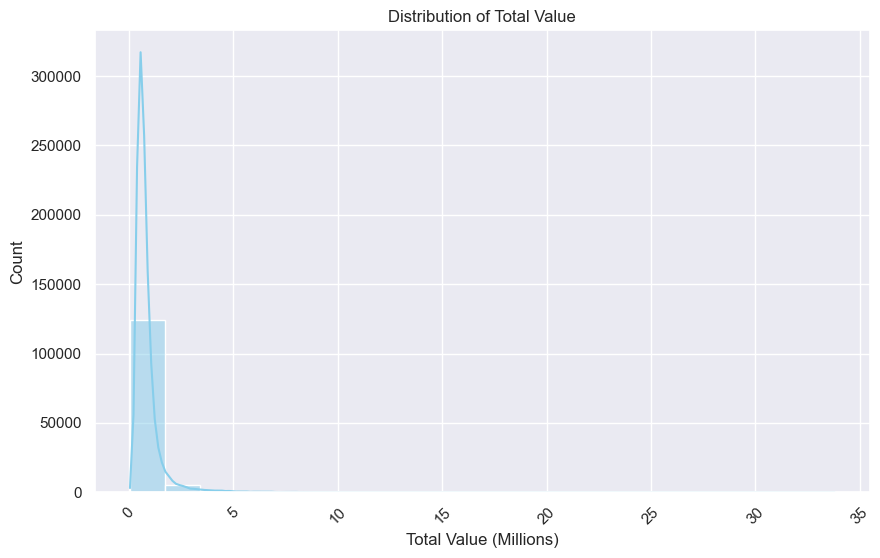

In [26]:
#Distribution of TOTAL_VALUE
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=property_data['TOTAL_VALUE'] / 1e6, kde=True, color='skyblue', bins=20)
plt.xlabel('Total Value (Millions)')
plt.ylabel('Count')
plt.title('Distribution of Total Value')
plt.xticks(rotation=45)
plt.show()

In [27]:
quantiles1 = property_data['TOTAL_VALUE'].quantile(np.arange(0, 1, 0.05))
# Calculate the quantile distribution from 0.95 to 1 in 0.01 intervals
quantiles2 = property_data['TOTAL_VALUE'].quantile(np.arange(0.95, 1, 0.01))
# Combine the two quantile distributions
combined_quantiles = np.concatenate([quantiles1, quantiles2])
combined_quantiles

#Sort the combined quantile array
sorted_quantiles = np.sort(combined_quantiles)

# Print the sorted quantile distribution
for i, quantile in enumerate(sorted_quantiles):
    if i < len(quantiles1):
        percentile = i * 0.05
    else:
        percentile = 0.95 + (i - len(quantiles1)) * 0.01
    print(f"{percentile:.2f} : {quantile:.2f}")



0.00 : 48300.00
0.05 : 327300.00
0.10 : 379900.00
0.15 : 420800.00
0.20 : 457000.00
0.25 : 492500.00
0.30 : 525500.00
0.35 : 558200.00
0.40 : 591800.00
0.45 : 626900.00
0.50 : 664000.00
0.55 : 702870.00
0.60 : 744200.00
0.65 : 792000.00
0.70 : 846800.00
0.75 : 915700.00
0.80 : 1004300.00
0.85 : 1124600.00
0.90 : 1334760.00
0.95 : 1841700.00
0.95 : 1841700.00
0.96 : 2036452.00
0.97 : 2372574.00
0.98 : 2906144.00
0.99 : 4118772.00
1.00 : 33790900.00


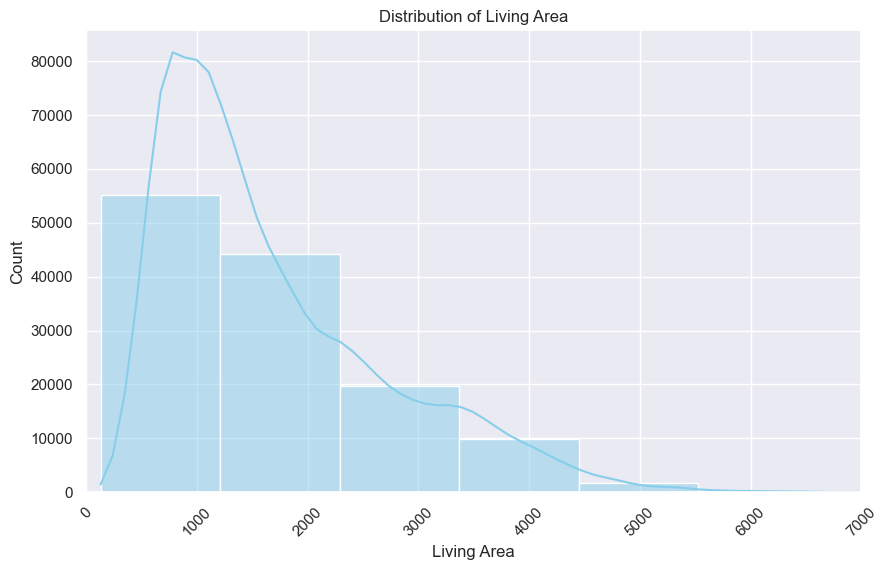

In [28]:
#Distribution of LIVING_AREA
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=property_data['LIVING_AREA'], kde=True, color='skyblue', bins=20)
plt.xlabel('Living Area')
plt.ylabel('Count')
plt.title('Distribution of Living Area')
plt.xticks(rotation=45)
plt.xlim(0, 7000)  # Set x-axis limits to 0 and 6000
plt.show()

In [29]:
quantiles1 = property_data['LIVING_AREA'].quantile(np.arange(0, 1, 0.05))
# Calculate the quantile distribution from 0.95 to 1 in 0.01 intervals
quantiles2 = property_data['LIVING_AREA'].quantile(np.arange(0.95, 1, 0.01))
# Combine the two quantile distributions
combined_quantiles = np.concatenate([quantiles1, quantiles2])
combined_quantiles

#Sort the combined quantile array
sorted_quantiles = np.sort(combined_quantiles)

# Print the sorted quantile distribution
for i, quantile in enumerate(sorted_quantiles):
    if i < len(quantiles1):
        percentile = i * 0.05
    else:
        percentile = 0.95 + (i - len(quantiles1)) * 0.01
    print(f"{percentile:.2f} : {quantile:.2f}")

0.00 : 130.00
0.05 : 540.00
0.10 : 646.00
0.15 : 735.00
0.20 : 812.00
0.25 : 904.00
0.30 : 998.00
0.35 : 1076.00
0.40 : 1170.00
0.45 : 1268.40
0.50 : 1377.00
0.55 : 1500.00
0.60 : 1644.00
0.65 : 1811.42
0.70 : 2013.52
0.75 : 2256.00
0.80 : 2522.00
0.85 : 2870.40
0.90 : 3300.84
0.95 : 3805.48
0.95 : 3805.48
0.96 : 3948.00
0.97 : 4119.00
0.98 : 4341.42
0.99 : 4726.50
1.00 : 21710.80


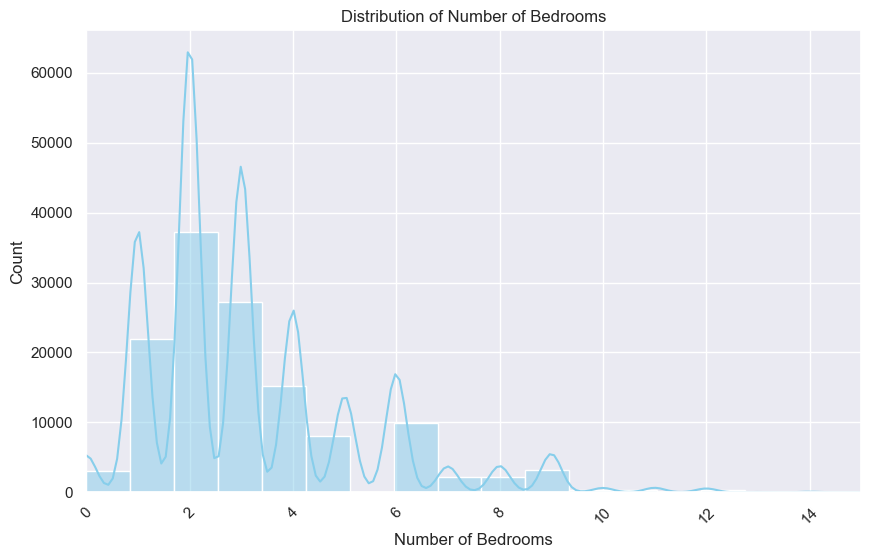

In [30]:
#Distribution of BED_RMS
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=property_data['BED_RMS'], kde=True, color='skyblue', bins=20)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.title('Distribution of Number of Bedrooms')
plt.xticks(rotation=45)
plt.xlim(0, 15)  # Set x-axis limits to 0 and 6000
plt.show()

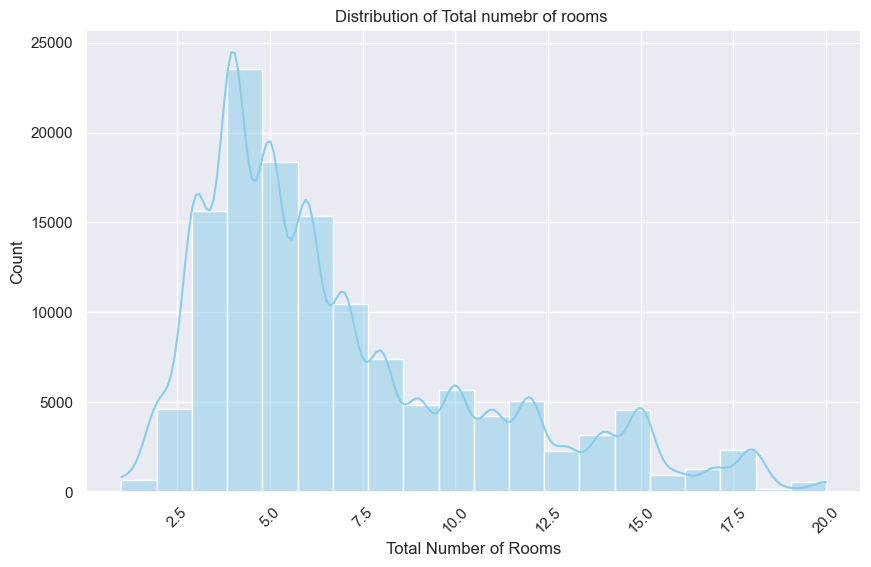

In [31]:
#Distribution of TT_RMS
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=property_data['TT_RMS'], kde=True, color='skyblue', bins=20)
plt.xlabel('Total Number of Rooms')
plt.ylabel('Count')
plt.title('Distribution of Total numebr of rooms ')
plt.xticks(rotation=45)
#plt.xlim(0, 15)  # Set x-axis limits to 0 and 6000
plt.show()

In [32]:
###Qunatile Distribution of Bed RMS
quantiles1 = property_data['BED_RMS'].quantile(np.arange(0, 1, 0.05))
# Calculate the quantile distribution from 0.95 to 1 in 0.01 intervals
quantiles2 = property_data['BED_RMS'].quantile(np.arange(0.95, 1, 0.01))
# Combine the two quantile distributions
combined_quantiles = np.concatenate([quantiles1, quantiles2])
combined_quantiles

#Sort the combined quantile array
sorted_quantiles = np.sort(combined_quantiles)
print("Bed rooms no distribution")
# Print the sorted quantile distribution
for i, quantile in enumerate(sorted_quantiles):
    if i < len(quantiles1):
        percentile = i * 0.05
    else:
        percentile = 0.95 + (i - len(quantiles1)) * 0.01
    print(f"{percentile:.2f} : {quantile:.2f}")

###Qunatile Distribution of Total rooms
quantiles1 = property_data['TT_RMS'].quantile(np.arange(0, 1, 0.05))
# Calculate the quantile distribution from 0.95 to 1 in 0.01 intervals
quantiles2 = property_data['TT_RMS'].quantile(np.arange(0.95, 1, 0.01))
# Combine the two quantile distributions
combined_quantiles = np.concatenate([quantiles1, quantiles2])
combined_quantiles

#Sort the combined quantile array
sorted_quantiles = np.sort(combined_quantiles)
print("Total rooms no distribution")
# Print the sorted quantile distribution
for i, quantile in enumerate(sorted_quantiles):
    if i < len(quantiles1):
        percentile = i * 0.05
    else:
        percentile = 0.95 + (i - len(quantiles1)) * 0.01
    print(f"{percentile:.2f} : {quantile:.2f}")

Bed rooms no distribution
0.00 : 0.00
0.05 : 1.00
0.10 : 1.00
0.15 : 1.00
0.20 : 2.00
0.25 : 2.00
0.30 : 2.00
0.35 : 2.00
0.40 : 2.00
0.45 : 2.00
0.50 : 3.00
0.55 : 3.00
0.60 : 3.00
0.65 : 3.00
0.70 : 4.00
0.75 : 4.00
0.80 : 5.00
0.85 : 5.00
0.90 : 6.00
0.95 : 8.00
0.95 : 8.00
0.96 : 8.00
0.97 : 9.00
0.98 : 9.00
0.99 : 9.00
1.00 : 17.00
Total rooms no distribution
0.00 : 1.00
0.05 : 3.00
0.10 : 3.00
0.15 : 3.00
0.20 : 4.00
0.25 : 4.00
0.30 : 4.00
0.35 : 5.00
0.40 : 5.00
0.45 : 5.00
0.50 : 6.00
0.55 : 6.00
0.60 : 7.00
0.65 : 7.00
0.70 : 8.00
0.75 : 9.00
0.80 : 10.00
0.85 : 12.00
0.90 : 13.00
0.95 : 15.00
0.95 : 15.00
0.96 : 16.00
0.97 : 17.00
0.98 : 18.00
0.99 : 18.00
1.00 : 20.00


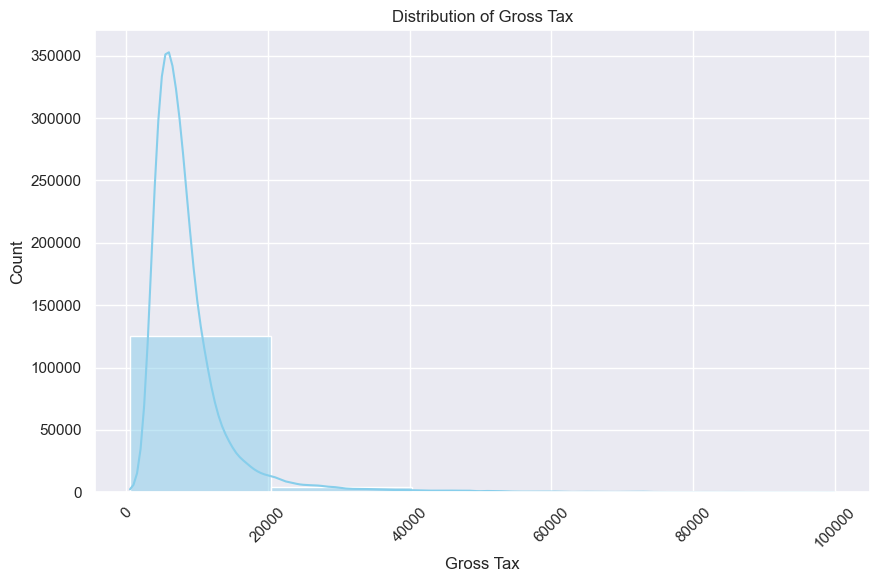

In [33]:
###Comment 
#Drop the outliers 
property_data = property_data[property_data['GROSS_TAX'] <= 100000]
value_counts = property_data['GROSS_TAX'].value_counts()

#Distribution of GROSS_TAX
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=property_data['GROSS_TAX'], kde=True, color='skyblue', bins=5)
plt.xlabel('Gross Tax')
plt.ylabel('Count')
plt.title('Distribution of Gross Tax')
plt.xticks(rotation=45)
#plt.xlim(0, 100000)  # Set x-axis limits to 0 and 6000
plt.show()

### Detection of Outliers

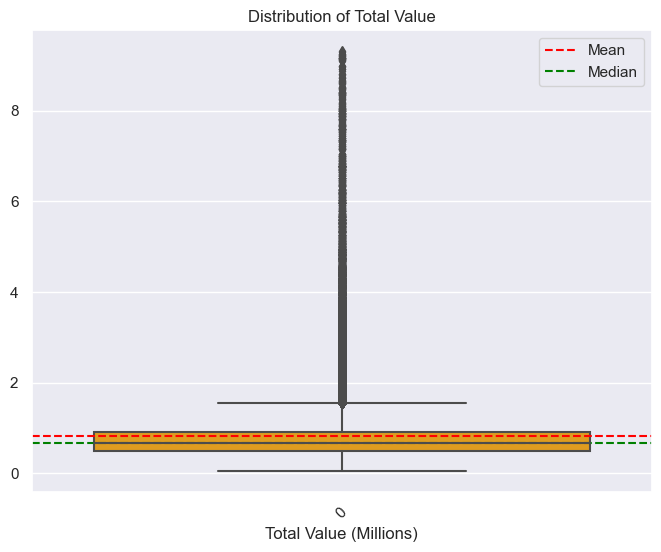

In [34]:
#Check ooutliers for TOTAL_VALUE
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.boxplot(data=property_data['TOTAL_VALUE'] / 1e6, color='orange')
plt.xlabel('Total Value (Millions)')
plt.title('Distribution of Total Value')
plt.xticks(rotation=45)

# Calculate mean and median values
mean_value = property_data['TOTAL_VALUE'].mean() / 1e6
median_value = property_data['TOTAL_VALUE'].median() / 1e6

# Add mean and median lines horizontally
plt.axhline(mean_value, color='red', linestyle='--', label='Mean')
plt.axhline(median_value, color='green', linestyle='--', label='Median')
plt.legend()

plt.show()

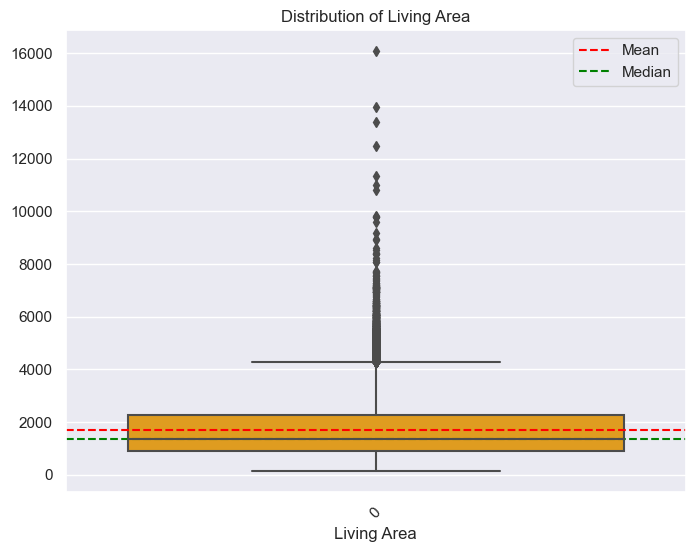

In [35]:
# Enhance the box plot
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.boxplot(data=property_data['LIVING_AREA'], color='orange')  # Set boxplot color to orange
plt.xlabel('Living Area')
plt.title('Distribution of Living Area')
plt.xticks(rotation=45)

# Calculate mean and median values
mean_value = property_data['LIVING_AREA'].mean()
median_value = property_data['LIVING_AREA'].median()

# Add mean and median lines horizontally
plt.axhline(mean_value, color='red', linestyle='--', label='Mean')
plt.axhline(median_value, color='green', linestyle='--', label='Median')
plt.legend()

# Display the plot
plt.show()

### Piecharts

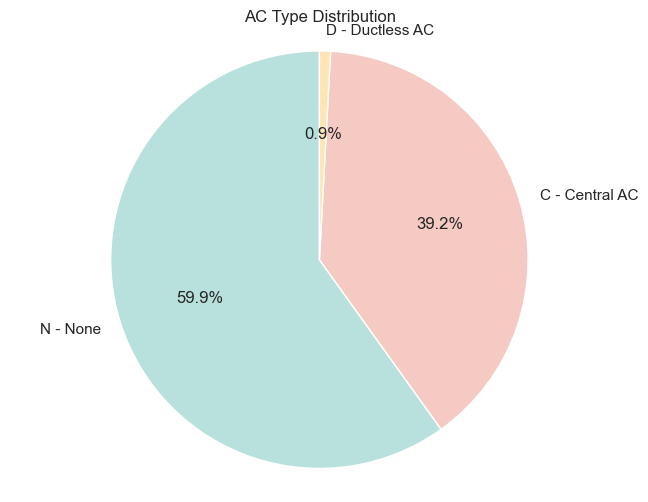

In [36]:
# Count the occurrences of each AC_TYPE
ac_type_counts = property_data['AC_TYPE'].value_counts()

# Define a custom color palette
colors = ['#b8e0dc', '#f5cac3', '#ffe5b4']

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.title('AC Type Distribution')
plt.pie(ac_type_counts, labels=ac_type_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart

# Display the pie chart
plt.show()

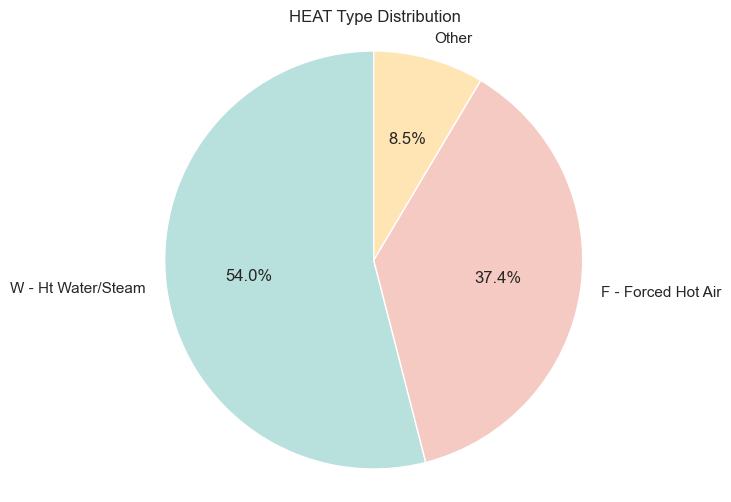

In [37]:
# Count the occurrences of each HEAT_TYPE
heat_type_counts = property_data['HEAT_TYPE'].value_counts()

# Define a custom color palette
colors = ['#b8e0dc', '#f5cac3', '#ffe5b4', '#d9c2ff', '#c3e6cb']

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.title('HEAT Type Distribution')

# Filter the top two labels
top_two_labels = heat_type_counts.index[:2]
other_count = heat_type_counts.sum() - heat_type_counts[top_two_labels].sum()

# Combine the top two labels with an 'Other' label
labels = list(top_two_labels) + ['Other']
sizes = list(heat_type_counts[top_two_labels]) + [other_count]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart

# Display the pie chart
plt.show()


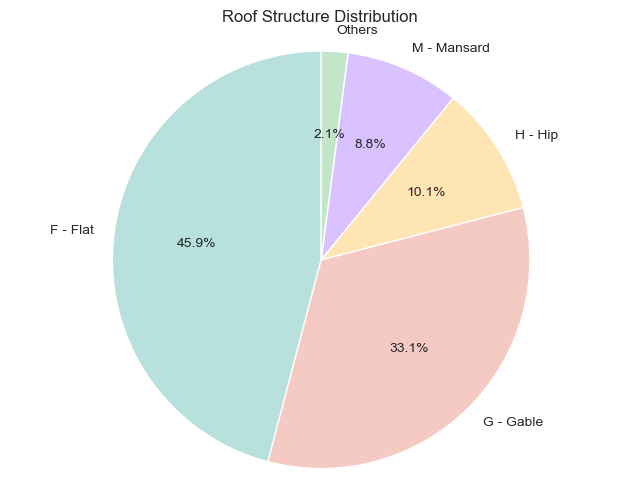

In [38]:
# Count the occurrences of each HEAT_TYPE
Roof_type_counts = property_data['ROOF_STRUCTURE'].value_counts()

# Define a custom color palette
colors = ['#b8e0dc', '#f5cac3', '#ffe5b4', '#d9c2ff', '#c3e6cb']

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.title('Roof Structure Distribution')

# Filter the top four labels
top_four_labels = Roof_type_counts.index[:4]
other_count = heat_type_counts.sum() - Roof_type_counts[top_four_labels].sum()

# Combine the top four labels with an 'Other' label
labels = list(top_four_labels) + ['Others']
sizes = list(Roof_type_counts[top_four_labels]) + [other_count]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 10})
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart

# Display the pie chart
plt.show()





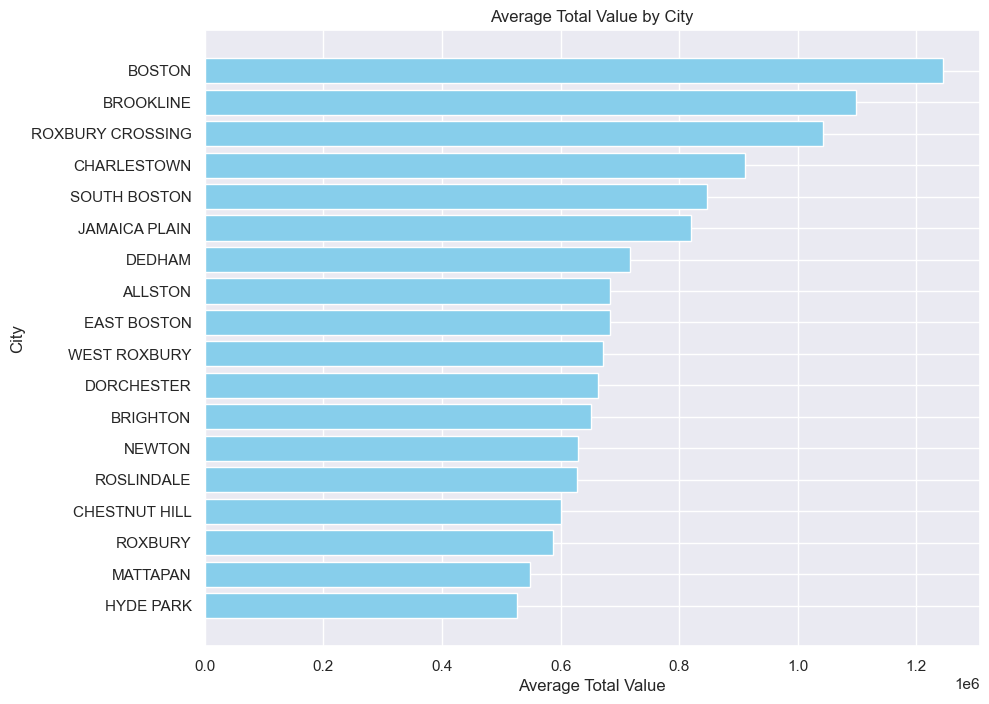

In [39]:
# Calculate average TOTAL_VALUE for each city
average_total_value = property_data.groupby('CITY')['TOTAL_VALUE'].mean().sort_values()

# Horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(average_total_value.index, average_total_value, color='skyblue')
plt.xlabel('Average Total Value')
plt.ylabel('City')
plt.title('Average Total Value by City')

plt.show()

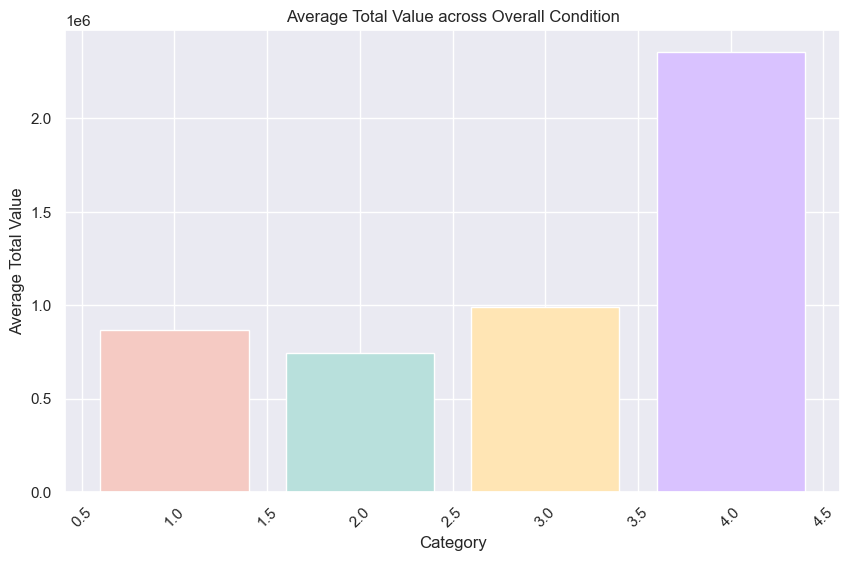

In [40]:
# Calculate average TOTAL_VALUE for each category
overall_cond_avg = property_data.groupby('OVERALL_COND')['TOTAL_VALUE'].mean().sort_values()

# Define a custom color palette
colors = ['#b8e0dc', '#f5cac3', '#ffe5b4', '#d9c2ff']
plt.figure(figsize=(10, 6))
plt.bar(overall_cond_avg.index, overall_cond_avg , color=colors)
plt.xlabel('Category')
plt.ylabel('Average Total Value')
plt.title('Average Total Value across Overall Condition')
plt.xticks(rotation=45)

plt.show()


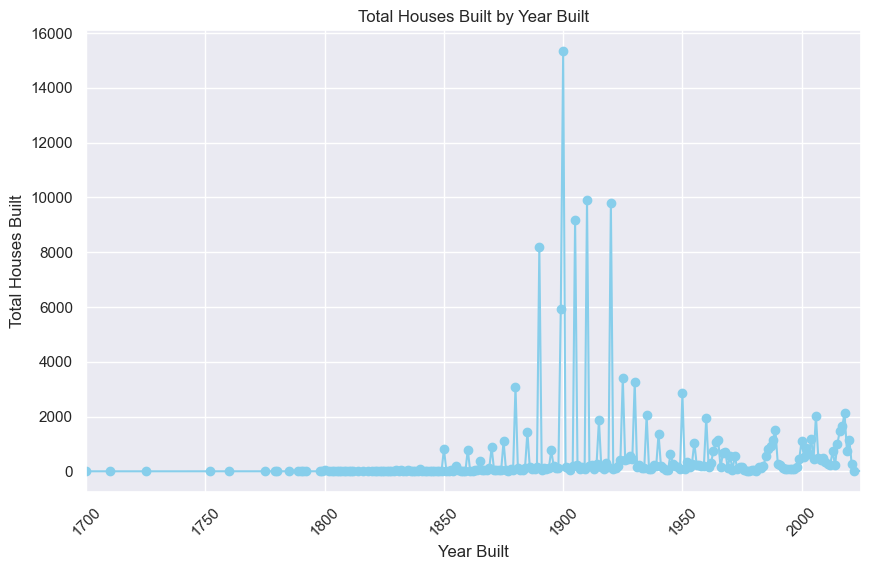

In [41]:
# Calculate average TOTAL_VALUE for each YR_BUILT
Count_houses = property_data.groupby('YR_BUILT')['PID'].nunique()

# Line chart
plt.figure(figsize=(10, 6))
plt.plot(Count_houses.index, Count_houses, color='skyblue', marker='o')
plt.xlabel('Year Built')
plt.ylabel('Total Houses Built')
plt.title('Total Houses Built by Year Built')
plt.xticks(rotation=45)

# Set x-axis limits
plt.xlim(1700, 2025)

plt.show()

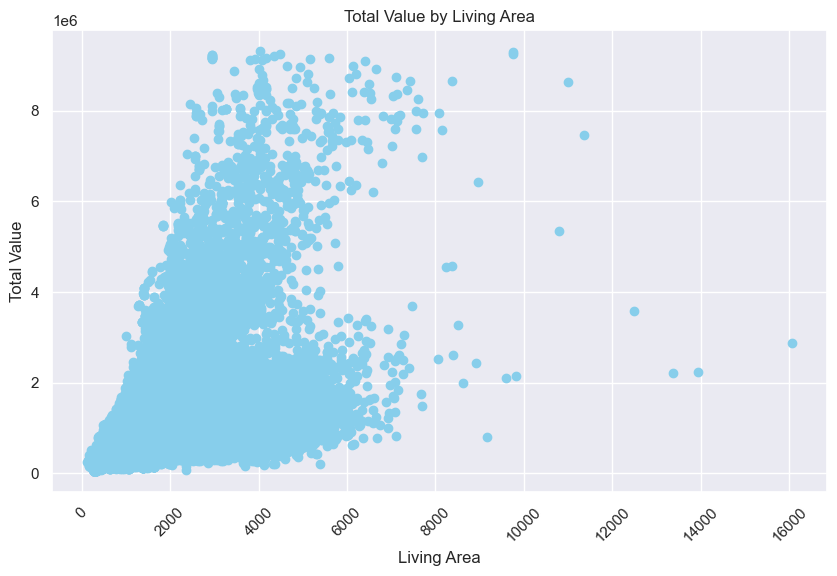

In [42]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(property_data['LIVING_AREA'],property_data['TOTAL_VALUE'],  color='skyblue', marker='o')
plt.xlabel('Living Area')
plt.ylabel('Total Value')
plt.title('Total Value by Living Area')
plt.xticks(rotation=45)

plt.show()

### Correlation Plot

In [43]:
corr = property_data.corr()

corr.style.background_gradient(cmap='coolwarm', low=0.8, high=0.2).set_precision(2)

,PID,LIVING_AREA,TOTAL_VALUE,GROSS_TAX,YR_BUILT,YR_REMODEL,INT_COND,EXT_COND,OVERALL_COND,BED_RMS,FULL_BTH,HLF_BTH,KITCHENS,TT_RMS,PROP_VIEW
PID,1.00,0.17,-0.25,-0.25,0.03,-0.13,-0.36,-0.32,-0.13,0.24,-0.01,0.07,0.08,0.23,-0.26
LIVING_AREA,0.17,1.00,0.43,0.43,-0.12,-0.16,-0.14,-0.16,0.05,0.85,0.75,0.17,0.75,0.89,-0.08
TOTAL_VALUE,-0.25,0.43,1.00,1.00,0.00,0.08,0.35,0.30,0.30,0.19,0.45,0.26,0.13,0.21,0.35
GROSS_TAX,-0.25,0.43,1.00,1.00,0.00,0.08,0.35,0.30,0.30,0.19,0.45,0.26,0.13,0.21,0.35
YR_BUILT,0.03,-0.12,0.00,0.00,1.00,0.12,0.21,0.27,0.12,-0.14,-0.05,0.07,-0.16,-0.16,0.14
YR_REMODEL,-0.13,-0.16,0.08,0.08,0.12,1.00,0.31,0.24,0.18,-0.19,-0.03,0.04,-0.19,-0.21,0.10
INT_COND,-0.36,-0.14,0.35,0.35,0.21,0.31,1.00,0.59,0.44,-0.24,0.05,0.09,-0.26,-0.27,0.32
EXT_COND,-0.32,-0.16,0.30,0.30,0.27,0.24,0.59,1.00,0.40,-0.27,0.02,0.07,-0.25,-0.29,0.35
OVERALL_COND,-0.13,0.05,0.30,0.30,0.12,0.18,0.44,0.40,1.00,-0.02,0.16,0.17,-0.08,-0.03,0.16
BED_RMS,0.24,0.85,0.19,0.19,-0.14,-0.19,-0.24,-0.27,-0.02,1.00,0.68,0.09,0.78,0.93,-0.18


In [44]:
#Removing Major NA value columns
#List out unwanted columns
unwanted_columns_v2 = ['GROSS_TAX','PID','AC_TYPE']

# Drop these rows from dataFrame
property_data = property_data.drop(unwanted_columns_v2, inplace = False, axis='columns')

### VIF 

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Performing VIF (variance inflation factor) to track multicollinearity 

# the independent variables set
numerical_columns = property_data.select_dtypes(include=['int64', 'float64']).columns
numerical_data = property_data[numerical_columns]
numerical_data

# the independent variables set
numerical_data = numerical_data.drop(['TOTAL_VALUE'], axis=1)
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = numerical_data.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(numerical_data.values, i) for i in range(len(numerical_data.columns))]

print(vif_data)

         feature    VIF
0    LIVING_AREA  23.34
1       YR_BUILT 523.23
2     YR_REMODEL 521.47
3       INT_COND  30.70
4       EXT_COND  32.35
5   OVERALL_COND  32.09
6        BED_RMS  24.45
7       FULL_BTH  14.48
8        HLF_BTH   1.63
9       KITCHENS  21.95
10        TT_RMS  55.07
11     PROP_VIEW  27.65


In [46]:
#Removing Major NA value columns
#List out unwanted columns
unwanted_columns_v3 = ['YR_BUILT', 'FULL_BTH' , 'TT_RMS', 'INT_COND', 'EXT_COND']
# Drop these rows from dataFrame
property_data = property_data.drop(unwanted_columns_v3, inplace = False, axis='columns')

### One-Hot Encoding 

In [47]:
# Get a list of categorical columns
categorical_columns = property_data.select_dtypes(include='object').columns.tolist()

# Perform one-hot encoding for all categorical columns
encoded_df = pd.get_dummies(property_data, columns=categorical_columns)

# Print the encoded DataFrame
display(encoded_df)

,LIVING_AREA,TOTAL_VALUE,YR_REMODEL,OVERALL_COND,BED_RMS,HLF_BTH,KITCHENS,PROP_VIEW,CITY_ALLSTON,CITY_BOSTON,CITY_BRIGHTON,CITY_BROOKLINE,CITY_CHARLESTOWN,CITY_CHESTNUT HILL,CITY_DEDHAM,CITY_DORCHESTER,CITY_EAST BOSTON,CITY_HYDE PARK,CITY_JAMAICA PLAIN,CITY_MATTAPAN,CITY_NEWTON,CITY_ROSLINDALE,CITY_ROXBURY,CITY_ROXBURY CROSSING,CITY_SOUTH BOSTON,CITY_WEST ROXBURY,ZIP_CODE_2026.0,ZIP_CODE_2108.0,ZIP_CODE_2109.0,ZIP_CODE_2110.0,ZIP_CODE_2111.0,ZIP_CODE_2113.0,ZIP_CODE_2114.0,ZIP_CODE_2115.0,ZIP_CODE_2116.0,ZIP_CODE_2118.0,ZIP_CODE_2119.0,ZIP_CODE_2120.0,ZIP_CODE_2121.0,ZIP_CODE_2122.0,ZIP_CODE_2124.0,ZIP_CODE_2125.0,ZIP_CODE_2126.0,ZIP_CODE_2127.0,ZIP_CODE_2128.0,ZIP_CODE_2129.0,ZIP_CODE_2130.0,ZIP_CODE_2131.0,ZIP_CODE_2132.0,ZIP_CODE_2134.0,ZIP_CODE_2135.0,ZIP_CODE_2136.0,ZIP_CODE_2199.0,ZIP_CODE_2210.0,ZIP_CODE_2215.0,ZIP_CODE_2445.0,ZIP_CODE_2446.0,ZIP_CODE_2458.0,ZIP_CODE_2467.0,LU_CD,LU_R1,LU_R2,LU_R3,ROOF_STRUCTURE_F - Flat,ROOF_STRUCTURE_G - Gable,ROOF_STRUCTURE_H - Hip,ROOF_STRUCTURE_L - Gambrel,ROOF_STRUCTURE_M - Mansard,ROOF_STRUCTURE_O - Other,ROOF_STRUCTURE_S - Shed,INT_WALL_E - Elaborate,INT_WALL_N - Normal,INT_WALL_S - Substandard,EXT_FNISHED_01 - Brick,EXT_FNISHED_09 - Wood Siding,EXT_FNISHED_A - Asbestos,EXT_FNISHED_B - Brick/Stone,EXT_FNISHED_C - Cement Board,EXT_FNISHED_F - Frame/Clapbrd,EXT_FNISHED_G - Glass,EXT_FNISHED_K - Concrete,EXT_FNISHED_M - Vinyl,EXT_FNISHED_O - Other,EXT_FNISHED_P - Asphalt,EXT_FNISHED_S - Stucco,EXT_FNISHED_U - Alum Siding,EXT_FNISHED_V - Brck/Stn Venr,EXT_FNISHED_W - Wood Shake,KITCHEN_TYPE_0F - 0 Full Eat In Kitchens,KITCHEN_TYPE_1F - 1 Full Eat In Kitchens,KITCHEN_TYPE_2F - 2 Full Eat In Kitchens,KITCHEN_TYPE_3F - 3 Full Eat In Kitchens,KITCHEN_TYPE_4F - 4 Full Eat In Kitchens,KITCHEN_TYPE_5F - 5 Full Eat In Kitchens,KITCHEN_TYPE_F - Full Eat In,KITCHEN_TYPE_N - None,KITCHEN_TYPE_O - One Person,KITCHEN_TYPE_P - Pullman,HEAT_TYPE_E - Electric,HEAT_TYPE_F - Forced Hot Air,HEAT_TYPE_N - None,HEAT_TYPE_O - Other,HEAT_TYPE_P - Heat Pump,HEAT_TYPE_S - Space Heat,HEAT_TYPE_W - Ht Water/Steam
0,2202.00,784200,1900.00,2.00,6.00,0.00,3.00,2.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2307.00,811800,2000.00,2.00,3.00,0.00,3.00,2.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2268.00,796300,1985.00,2.00,5.00,0.00,3.00,2.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2028.00,727900,1991.00,2.00,5.00,0.00,3.00,2.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2546.00,794800,1978.00,2.00,6.00,0.00,2.00,2.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180617,2390.40,887200,1920.00,2.00,7.00,1.00,1.00,2.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
180618,2951.60,1115300,1920.00,2.00,5.00

In [48]:
categorical_columns

['CITY',
 'ZIP_CODE',
 'LU',
 'ROOF_STRUCTURE',
 'INT_WALL',
 'EXT_FNISHED',
 'KITCHEN_TYPE',
 'HEAT_TYPE']

### Train  - Test Split 

In [49]:
X = encoded_df.drop('TOTAL_VALUE', axis=1)
Y = encoded_df[['TOTAL_VALUE']]
# Assuming you have your feature data in X and target variable in y
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
display(X.head())
display(Y.head())

,LIVING_AREA,YR_REMODEL,OVERALL_COND,BED_RMS,HLF_BTH,KITCHENS,PROP_VIEW,CITY_ALLSTON,CITY_BOSTON,CITY_BRIGHTON,CITY_BROOKLINE,CITY_CHARLESTOWN,CITY_CHESTNUT HILL,CITY_DEDHAM,CITY_DORCHESTER,CITY_EAST BOSTON,CITY_HYDE PARK,CITY_JAMAICA PLAIN,CITY_MATTAPAN,CITY_NEWTON,CITY_ROSLINDALE,CITY_ROXBURY,CITY_ROXBURY CROSSING,CITY_SOUTH BOSTON,CITY_WEST ROXBURY,ZIP_CODE_2026.0,ZIP_CODE_2108.0,ZIP_CODE_2109.0,ZIP_CODE_2110.0,ZIP_CODE_2111.0,ZIP_CODE_2113.0,ZIP_CODE_2114.0,ZIP_CODE_2115.0,ZIP_CODE_2116.0,ZIP_CODE_2118.0,ZIP_CODE_2119.0,ZIP_CODE_2120.0,ZIP_CODE_2121.0,ZIP_CODE_2122.0,ZIP_CODE_2124.0,ZIP_CODE_2125.0,ZIP_CODE_2126.0,ZIP_CODE_2127.0,ZIP_CODE_2128.0,ZIP_CODE_2129.0,ZIP_CODE_2130.0,ZIP_CODE_2131.0,ZIP_CODE_2132.0,ZIP_CODE_2134.0,ZIP_CODE_2135.0,ZIP_CODE_2136.0,ZIP_CODE_2199.0,ZIP_CODE_2210.0,ZIP_CODE_2215.0,ZIP_CODE_2445.0,ZIP_CODE_2446.0,ZIP_CODE_2458.0,ZIP_CODE_2467.0,LU_CD,LU_R1,LU_R2,LU_R3,ROOF_STRUCTURE_F - Flat,ROOF_STRUCTURE_G - Gable,ROOF_STRUCTURE_H - Hip,ROOF_STRUCTURE_L - Gambrel,ROOF_STRUCTURE_M - Mansard,ROOF_STRUCTURE_O - Other,ROOF_STRUCTURE_S - Shed,INT_WALL_E - Elaborate,INT_WALL_N - Normal,INT_WALL_S - Substandard,EXT_FNISHED_01 - Brick,EXT_FNISHED_09 - Wood Siding,EXT_FNISHED_A - Asbestos,EXT_FNISHED_B - Brick/Stone,EXT_FNISHED_C - Cement Board,EXT_FNISHED_F - Frame/Clapbrd,EXT_FNISHED_G - Glass,EXT_FNISHED_K - Concrete,EXT_FNISHED_M - Vinyl,EXT_FNISHED_O - Other,EXT_FNISHED_P - Asphalt,EXT_FNISHED_S - Stucco,EXT_FNISHED_U - Alum Siding,EXT_FNISHED_V - Brck/Stn Venr,EXT_FNISHED_W - Wood Shake,KITCHEN_TYPE_0F - 0 Full Eat In Kitchens,KITCHEN_TYPE_1F - 1 Full Eat In Kitchens,KITCHEN_TYPE_2F - 2 Full Eat In Kitchens,KITCHEN_TYPE_3F - 3 Full Eat In Kitchens,KITCHEN_TYPE_4F - 4 Full Eat In Kitchens,KITCHEN_TYPE_5F - 5 Full Eat In Kitchens,KITCHEN_TYPE_F - Full Eat In,KITCHEN_TYPE_N - None,KITCHEN_TYPE_O - One Person,KITCHEN_TYPE_P - Pullman,HEAT_TYPE_E - Electric,HEAT_TYPE_F - Forced Hot Air,HEAT_TYPE_N - None,HEAT_TYPE_O - Other,HEAT_TYPE_P - Heat Pump,HEAT_TYPE_S - Space Heat,HEAT_TYPE_W - Ht Water/Steam
0,2202.00,1900.00,2.00,6.00,0.00,3.00,2.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2307.00,2000.00,2.00,3.00,0.00,3.00,2.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2268.00,1985.00,2.00,5.00,0.00,3.00,2.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2028.00,1991.00,2.00,5.00,0.00,3.00,2.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2546.00,1978.00,2.00,6.00,0.00,2.00,2.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


,TOTAL_VALUE
0,784200
1,811800
2,796300
3,727900
4,794800


In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Check the shape of the arrays
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (104935, 104)
X_test shape: (26234, 104)
Y_train shape: (104935, 1)
Y_test shape: (26234, 1)


### Linear Regression 

In [51]:
regr = LinearRegression()
regr.fit(X_train, Y_train)
print(regr.score(X_test, Y_test))

0.6970339067027784


In [52]:
mod = sm.OLS(Y_train, X_train)

lin = mod.fit()

print(lin.summary())

                            OLS Regression Results                            
Dep. Variable:            TOTAL_VALUE   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     2836.
Date:                Wed, 28 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:27:54   Log-Likelihood:            -1.4924e+06
No. Observations:              104935   AIC:                         2.985e+06
Df Residuals:                  104845   BIC:                         2.986e+06
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [53]:
summary = lin.summary()
results_data = []
for row in summary.tables[1].data[1:]:
    results_data.append([val if val != '' else float('nan') for val in row])

column_names = summary.tables[1].data[0]
df = pd.DataFrame(results_data, columns=column_names)

numeric_columns = ['coef', 'std err', 't', 'P>|t|', '[0.025', '0.975]']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

filtered_df = df[df['P>|t|'] <= 0.05]

filtered_df = df[df['P>|t|'] <= 0.05]
sorted_df = filtered_df.sort_values(by='P>|t|')
filtered_df

,,coef,std err,t,P>|t|,[0.025,0.975]
0,LIVING_AREA,489.67,2.42,202.44,0.00,484.93,494.41
1,YR_REMODEL,757.59,31.65,23.94,0.00,695.55,819.62
2,OVERALL_COND,93350.00,2729.54,34.20,0.00,88000.00,98700.00
3,BED_RMS,-15250.00,1256.53,-12.14,0.00,-17700.00,-12800.00
4,HLF_BTH,91090.00,2622.15,34.74,0.00,85900.00,96200.00
5,KITCHENS,131100.00,10500.00,12.50,0.00,110000.00,152000.00
6,PROP_VIEW,179500.00,2984.23,60.15,0.00,174000.00,185000.00
7,CITY_ALLSTON,-88840.00,19900.00,-4.47,0.00,-128000.00,-49900.00
9,CITY_BRIGHTON,-93670.00,19700.00,-4.75,0.00,-132000.00,-55100.00
10,CITY_BROOKLINE,-183000.00,79800.00,-2.29,0.02,-339000.00,-26700.00


In [54]:
from sklearn.metrics import r2_score
y_pred = lin.predict(X_test)

# Calculate R-squared score
lr_r2 =r2_score(Y_test, y_pred)
print("R-squared Score:", lr_r2)

# Calculate root mean squared error (RMSE)
lr_rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
print("Root Mean Squared Error (RMSE):", lr_rmse)



R-squared Score: 0.697033906702779
Root Mean Squared Error (RMSE): 382860.1184572924


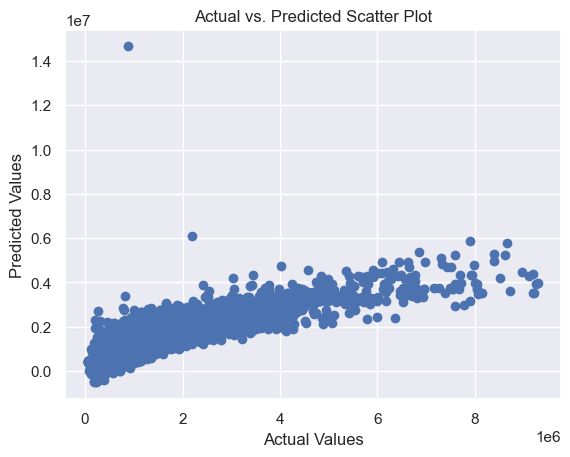

In [55]:
#Create a scatter plot of actual vs. predicted values
plt.scatter(Y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Scatter Plot')
plt.show()

In [56]:
from sklearn.preprocessing import StandardScaler
# Create a standard scaler object
scaler = StandardScaler()

# Standardize the training features
X_train_scaled = scaler.fit_transform(X_train)

# Convert the standardized features array back to a DataFrame with column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Perform linear regression on the standardized features
mod_std = sm.OLS((Y_train.values), X_train_scaled_df)
lin_std = mod_std.fit()

summary_std = lin_std.summary()
results_data = []
for row in summary_std.tables[1].data[1:]:
    results_data.append([val if val != '' else float('nan') for val in row])

column_names = summary_std.tables[1].data[0]
df_std = pd.DataFrame(results_data, columns=column_names)

numeric_columns = ['coef', 'std err', 't', 'P>|t|', '[0.025', '0.975]']
df_std[numeric_columns] = df_std[numeric_columns].apply(pd.to_numeric, errors='coerce')

filtered_df_std = df_std[df_std['P>|t|'] <= 0.05]

filtered_df_std = df_std[df_std['P>|t|'] <= 0.05]
sorted_df_std = filtered_df_std.sort_values(by='coef', ascending=False)
sorted_df_std.head(10)


,,coef,std err,t,P>|t|,[0.025,0.975]
0,LIVING_AREA,510400.00,6253.55,81.61,0.00,498000.00,523000.00
33,ZIP_CODE_2116.0,116000.00,41900.00,2.77,0.01,33900.00,198000.00
5,KITCHENS,86860.00,17200.00,5.04,0.00,53100.00,121000.00
6,PROP_VIEW,82300.00,3393.35,24.25,0.00,75600.00,88900.00
69,INT_WALL_E - Elaborate,80990.00,1756.60,46.10,0.00,77500.00,84400.00
26,ZIP_CODE_2108.0,75090.00,19000.00,3.96,0.00,37900.00,112000.00
4,HLF_BTH,45120.00,3221.44,14.01,0.00,38800.00,51400.00
2,OVERALL_COND,43810.00,3177.34,13.79,0.00,37600.00,50000.00
52,ZIP_CODE_2210.0,38440.00,18900.00,2.03,0.04,1368.17,75500.00
1,YR_REMODEL,32100.00,3326.51,9.65,0.00,25600.00,38600.00


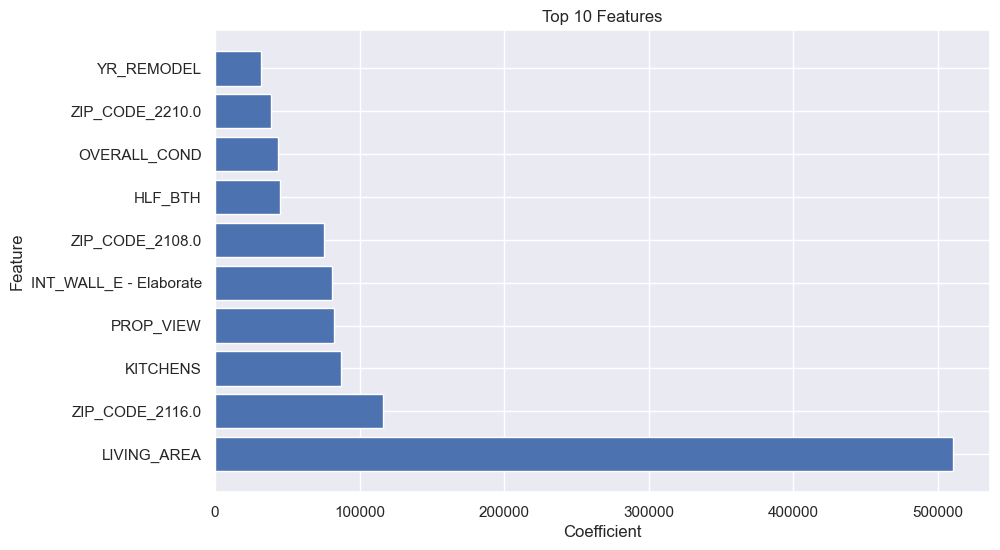

In [57]:
##Feature Importance in Linear Regression 

top_10_coeffs = sorted_df_std.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_coeffs.iloc[:, 0], top_10_coeffs['coef'])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top 10 Features')
plt.show()


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate the model
rf = RandomForestRegressor(n_estimators = 50, random_state= 40)

rf.fit(X_train, Y_train)

rf.score(X_test, Y_test)


In [ ]:
Y_pred = rf.predict(X_test)

# Calculate R-squared score
rf_r2 =r2_score(Y_test, Y_pred)
print("R-squared Score:", rf_r2)

# Calculate root mean squared error (RMSE)
rf_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("Root Mean Squared Error (RMSE):", rf_rmse)


In [ ]:
# Get feature importances
importances = rf.feature_importances_

# Create a list of (feature, importance) tuples
feature_importances = list(zip(X.columns, importances))

# Sort the feature importances in descending order based on importance
sorted_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Print the sorted feature importances
print("Feature Importances (Descending Order):")
for feature, importance in sorted_importances:
    print(feature, ":", importance)


In [ ]:
# Assuming you have already calculated and sorted the feature importances

# Extract the top 10 feature names and importance values from the sorted_importances list
top_features = [feature for feature, _ in sorted_importances[:15]]
top_importances = [importance for _, importance in sorted_importances[:15]]

# Create a horizontal bar plot for the top 10 features
plt.barh(range(len(top_features)), top_importances, align='center')
plt.yticks(range(len(top_features)), top_features)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances')

# Display the plot
plt.show()



In [ ]:
#Create a scatter plot of actual vs. predicted values
plt.scatter(Y_test, Y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Scatter Plot')
plt.show()

# Model Comparison 

In [ ]:
# Create bar plot for R2 values
r2_values = [lr_r2, rf_r2]
models = ['Linear Regression', 'Random Forest']
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 2)  # Create subplot for R2 values
plt.bar(models, r2_values)
plt.ylim(0, 1)  # Set y-axis limit for R2 values (0 to 1)
plt.title('R2 Comparison')
plt.xlabel('Models')
plt.ylabel('R2')

# Create bar plot for RMSE values
rmse_values = [lr_rmse, rf_rmse]

plt.subplot(1, 2, 1)  # Create subplot for RMSE values
plt.bar(models, rmse_values)
plt.title('RMSE Comparison')
plt.xlabel('Models')
plt.ylabel('RMSE')

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()
